In [ ]:
# Test here F1 score

In [4]:
import numpy as np
import collections
from sklearn.metrics import f1_score
import sys
sys.path.append('/home/evgenia/tools/v2/Arctic-midlat/Python_scripts/functions')
from collections import defaultdict #
from calculations import get_metric_f1 as f1
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

masking_list = [ 'DJF', 'OND', 'JFM']
pc_element = 0.01
#associated with f1-score alpha
alpha = 0.01
#sns.set(style="darkgrid")
base_scen = '/home/evgenia/tools/v2/Arctic-midlat/output/PCMCI_plus/scenario/dicts_from_PCMCIplus/13072022/'
base_folder = '/home/evgenia/tools/v2/Arctic-midlat/output/PCMCI_plus/dicts_from_PCMCIplus/14072022/'

In [5]:
dictionary = np.load(base_folder + "1causal_links_historical_10actors_for_f1.npy",allow_pickle='TRUE').item()
dictionary_scenario = np.load(base_scen + "1causal_links_historical_10actors_for_f1_scenario.npy",allow_pickle='TRUE').item()

In [6]:
df_f1score= {}
f1_dict = {}
score_list =[]
for masking in masking_list: 
    f1_dict.setdefault (masking, {})
    for key in dictionary:
        if key != 'OBS':
            ref_p_matrix= dictionary['OBS'][masking][pc_element]['results']['p_matrix']
            p_matrix= dictionary[key][masking][pc_element]['results']['p_matrix']
            ref_val_matrix= dictionary['OBS'][masking][pc_element]['results']['val_matrix']
            val_matrix= dictionary[key][masking][pc_element]['results']['val_matrix']
            precision, recall, TP, FP, FN, score, auto, count = f1(ref_p_matrix, p_matrix, ref_val_matrix, val_matrix, alpha, 
                        tau_min=0, tau_diff=2, same_sign=True)
            f1_dict[masking].setdefault(key, score)

In [7]:
f1_dict_scenario = {}
for masking in masking_list: 
    f1_dict_scenario.setdefault (masking, {})
    
    for key in dictionary_scenario:
        # for each future simulations set a reference of historical simulation
        ref_p_matrix= dictionary[key][masking][pc_element]['results']['p_matrix']
        ref_val_matrix= dictionary[key][masking][pc_element]['results']['val_matrix']  
        # calculate f1-score
        p_matrix= dictionary_scenario[key][masking][pc_element]['results']['p_matrix']
        val_matrix= dictionary_scenario[key][masking][pc_element]['results']['val_matrix']
        precision, recall, TP, FP, FN, score, auto, count = f1(ref_p_matrix, p_matrix, ref_val_matrix, val_matrix, alpha, 
                    tau_min=0, tau_diff=0, same_sign=True)
        f1_dict_scenario[masking].setdefault(key, score)

/tmp/ipykernel_15119/2528313493.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(labels =f1_dict['DJF'].keys (), rotation="30" ,horizontalalignment= "right")


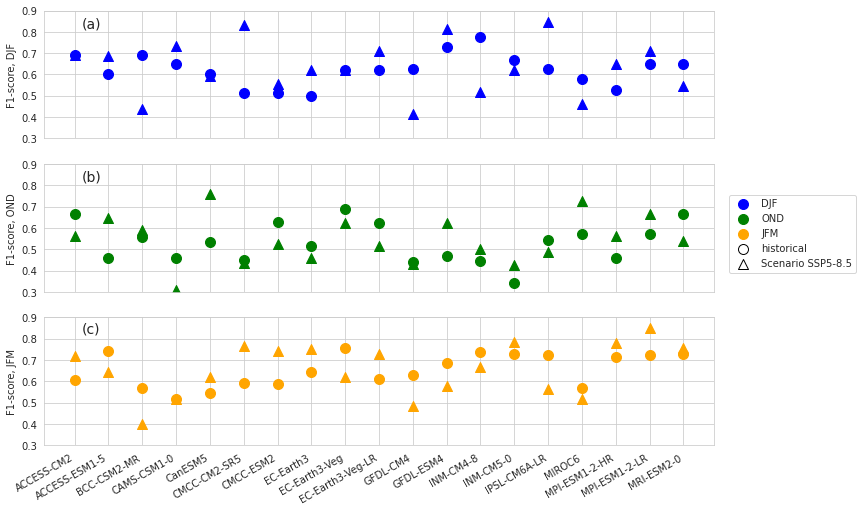

In [16]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(12,8))

a = axs[0].scatter(f1_dict['DJF'].keys(), f1_dict['DJF'].values(),  s=100, label = 'DJF', color = 'blue')
axs[0].scatter(f1_dict_scenario['DJF'].keys(), f1_dict_scenario['DJF'].values(),  s=100, label = 'DJF', color = 'blue', marker = "^")
axs[0].set_ylim (0.3, 0.9)
axs[0].set_ylabel ('F1-score, DJF')
plt.yticks(np.arange(0.3, 1, 0.1))

b = axs[1].scatter(f1_dict['OND'].keys(), f1_dict['OND'].values(),  s=100, label = 'OND', color = 'green')
axs[1].scatter(f1_dict_scenario['OND'].keys(), f1_dict_scenario['OND'].values(),  s=100, label = 'OND', color = 'green', marker = "^")
axs[1].set_ylabel ('F1-score, OND')

c = axs[2].scatter(f1_dict['JFM'].keys(), f1_dict['JFM'].values(),  s=100, label = 'JFM', color = 'orange')
axs[2].scatter(f1_dict_scenario['JFM'].keys(), f1_dict_scenario['JFM'].values(),  s=100, label = 'JFM', color = 'orange', marker = "^")
axs[2].set_ylabel ('F1-score, JFM')
axs[2].set_xticklabels(labels =f1_dict['DJF'].keys (), rotation="30" ,horizontalalignment= "right")
d = axs[0].scatter (0,0, s= 100, color = 'white',edgecolor='k')
e = axs[0].scatter (0,0, s= 100, color = 'white', edgecolor='k', marker = "^")
plt.legend([ a, b, c, d, e], [  'DJF','OND', 'JFM', "historical", "Scenario SSP5-8.5" ] , bbox_to_anchor =(1.22, 2.))

plt.text(0.2,2.26 ,'(a)', fontsize = 14)
plt.text(0.2,1.54 ,'(b)', fontsize = 14)
plt.text(0.2,0.83 ,'(c)', fontsize = 14)
plt.savefig ('/home/evgenia/tools/v2/Arctic-midlat/output/PCMCI_plus/f1_score/historical_vs_scenario_f1.png', dpi =120, bbox_inches = 'tight')